# Assignment 2

The assignment 2 contains 3 questions and the due date is May 1 (Monday) 23:59PM.

## Question 1 Image Compression

In this question, you will work with images and apply KMeans for image compression, by reducing the number of colours that occur in an image to only those that are most common in that image.


### Question 1.1 (0 points)

To let you learn how Python work with images, plese complete this question.

### Black & white images

Each images represent a matrix where each pixel is an element of this matrix 
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">
The scale of colors is between 0 and 255 : 0 correspond to black and 255 to white

### Colored images
<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

Every color is a linear combinaison of primary colors : Red Green Blue <br/>
A colored image is somehow just the supperposition of three images : for each pixel with have three values




### Download images

We are using the famous [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) that consists of 60000 32x32 color images in 10 classes, with 6000 images per class. We need to donwload this dataset from tensorflow. If you have not installed tensorflow, please follow the [instllation guide](https://www.tensorflow.org/install) to get it or simply use Google colab for this assignment.




In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tensorflow import keras
%matplotlib inline
import keras
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, make_scorer
from time import time
from sklearn.cluster import KMeans
from skimage.color import rgb2gray

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


By checking the shape, you will find the train set contains 50,000 images with the shape of (32, 32, 3) that indicates the image resolution with 3 color channels.

In [3]:
x_train.shape

(50000, 32, 32, 3)

You can visually check a random image:

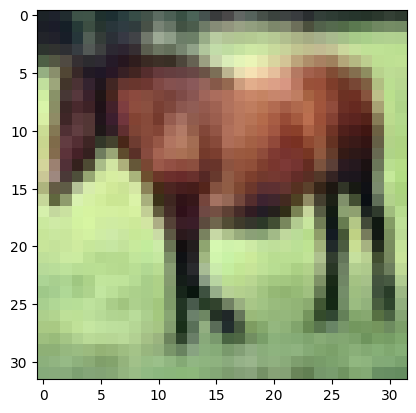

In [4]:
plt.imshow(x_train[7])

We can also check the image at each of three channels:

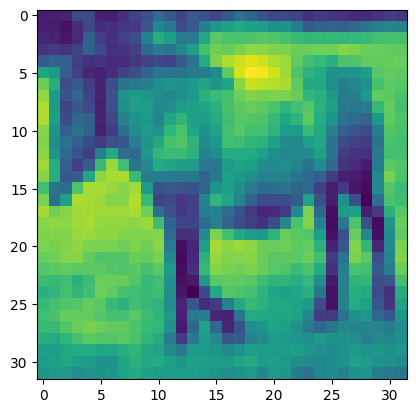

In [5]:
plt.imshow(x_train[7][:, :, 0])

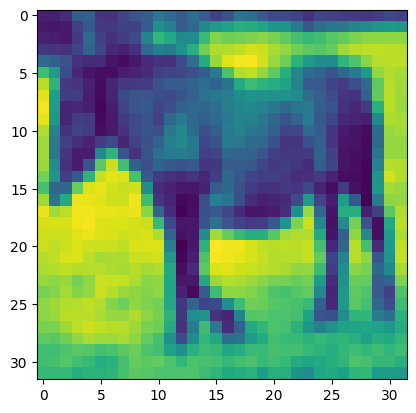

In [6]:
plt.imshow(x_train[7][:, :, 1])

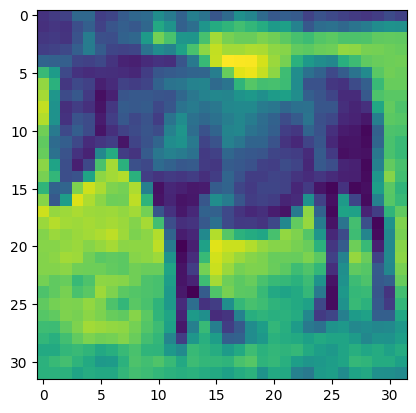

In [7]:
plt.imshow(x_train[7][:, :, 2])

We can convert a color image as a greyscale image using the NTSC formula: 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. This formula closely represents the average person's relative perception of the brightness of red, green, and blue light.

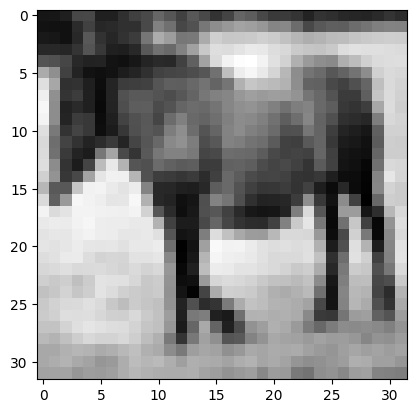

In [8]:
R, G, B = x_train[7][:,:,0], x_train[7][:,:,1], x_train[7][:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')

### Question 1.2 (10 points)

Convert all color images in x_train into greyscale images and use the sklearn.decomposition.PCA to perform principal component analysis to the dataset to reduce dimensions to 256. Then, reconstruct images from its reduced representation. Choose a image and see how it goes before and after the PCA using imread method. Explain your findings.  

**Hint** You may need to use numpy's reshape method to change the representation of each image as a vector before performing PCA and reshape it back as an image before you are able to visualize it.

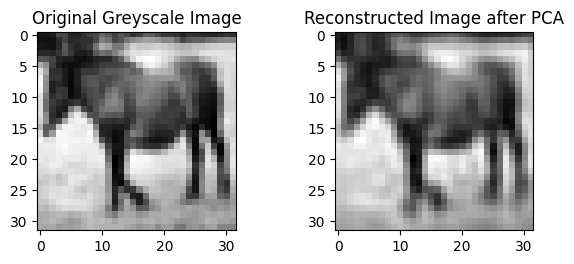

In [9]:
# Convert all color images in x_train into greyscale images using a for loop
x_train_gray = []
for i in range(len(x_train)):
    imgGray = rgb2gray(x_train[i])
    x_train_gray.append(imgGray)

# Reshape the greyscale images as vectors using a list comprehension
x_train_gray_vector = [gray_img.reshape(-1) for gray_img in x_train_gray]

# Perform PCA to reduce dimensions to 256
pca = PCA(n_components=256)
x_train_pca = pca.fit_transform(x_train_gray_vector)

# Reconstruct the images from their reduced representation
x_train_reconstructed = pca.inverse_transform(x_train_pca)

# Reshape the reconstructed images back to their original shape using a list comprehension
x_train_reconstructed = [reconstructed_img.reshape(x_train_gray[0].shape) for reconstructed_img in x_train_reconstructed]

# Choose an image index to visualize
image_index = 7

# Plot the original greyscale image
plt.subplot(121)
plt.imshow(x_train_gray[image_index], cmap='gray')
plt.title('Original Greyscale Image')

# Plot the reconstructed image
plt.subplot(122)
plt.imshow(x_train_reconstructed[image_index], cmap='gray')
plt.title('Reconstructed Image after PCA')

# Adjust the location of the plots
plt.subplots_adjust(wspace=0.5)

# Display the plots
plt.show()

**Results**:

The reconstructed image is slightly blurrier than the original image when comparing the original greyscale image and the reconstructed image after PCA. This is so that the dimensions of the data can be reduced by PCA, which only keeps the principal components that account for the vast majority of the variance in the dataset. However, some information is lost in the process, which may cause the reconstructed images to lack some detail.

PCA can be helpful for image compression despite the loss of detail because it shrinks the size of the image representation while keeping the majority of the crucial data. This may result in lower storage needs and quicker machine learning task processing times.

### Question 1.3 (10 points)

Now explain which number of principal components should be chosen using Elbow method if PCA reaches 90% threshold of explained variance. Use the obtained number of principal components to reduce the image dimensions and again compare the reconstructed images from the previous step. Expalin your findings.

Number of principal components required to reach 90% explained variance: 76


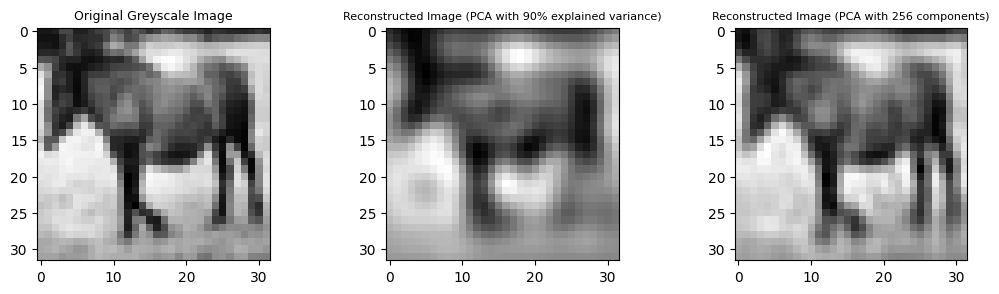

In [10]:
# Convert all color images in x_train into greyscale images
x_train_gray = np.dot(x_train, [0.2989, 0.5870, 0.1140])

# Flatten the images to a 2D array
x_train_gray_flattened = x_train_gray.reshape(x_train_gray.shape[0], -1)

# Implement the Elbow method for the PCA
explained_variance_threshold = 0.90
cumulative_explained_variance = 0
n_components = 0

pca = PCA()
pca.fit(x_train_gray_flattened)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance >= explained_variance_threshold) + 1

print("Number of principal components required to reach 90% explained variance:", n_components)

# Perform PCA with the optimal number of principal components
pca_optimal = PCA(n_components=n_components)
x_train_gray_pca = pca_optimal.fit_transform(x_train_gray_flattened)

# Reconstruct the images
x_train_gray_reconstructed = pca_optimal.inverse_transform(x_train_gray_pca)

# Reshape the reconstructed images back to their original shape using a list comprehension
x_train_gray_reconstructed = [reconstructed_img.reshape(x_train_gray[0].shape) for reconstructed_img in x_train_gray_reconstructed]

# Choose an image index to visualize
image_index = 7

plt.figure(figsize=(12, 4))

# Original greyscale image
plt.subplot(131)
plt.imshow(x_train_gray[image_index], cmap='gray')
plt.title('Original Greyscale Image', fontsize=9)

# Reconstructed image after PCA with 90% explained variance
plt.subplot(132)
plt.imshow(x_train_gray_reconstructed[image_index], cmap='gray')
plt.title('Reconstructed Image (PCA with 90% explained variance)', fontsize=8)

# Reconstructed image after PCA with 256 components
plt.subplot(133)
# Perform PCA with 256 components
pca_256 = PCA(n_components=256)
x_train_gray_pca_256 = pca_256.fit_transform(x_train_gray_flattened)
x_train_gray_reconstructed_256 = pca_256.inverse_transform(x_train_gray_pca_256)
x_train_gray_reconstructed_256 = [reconstructed_img.reshape(x_train_gray[0].shape) for reconstructed_img in x_train_gray_reconstructed_256]

plt.imshow(x_train_gray_reconstructed_256[image_index], cmap='gray')
plt.title('Reconstructed Image (PCA with 256 components)', fontsize=8)

# Adjust the location of the plots
plt.subplots_adjust(wspace=0.5)
plt.show()

**Results**:

The Elbow method helps in determining the ideal number of PCA principal components for compressing images. Image detail and compression are balanced by choosing components that take 90% of the variance. A blurrier but still recognisable image can be seen when comparing reconstructed images with fewer components to those with 256 components. This compromise maintains an acceptable level of image quality for a variety of applications while enabling more effective image representation in terms of storage and computation.

### Question 1.4 (10 points)

Now build an image classifier of Logistic Regression (with default configuration) to predict the class of images using the original greyscale images and the compressed representations from PCA that explains 90% of variance. Use the 5-fold cross-validation to report the average macro-f1 test score (given this is a balanced dataset) and total fit time. Explain your findings.

Hint: y_train contains the uint8 value and cross-validate would not consider it as the label for classification. You need to convert the y_train into categorical values such that cross-validate would perform multi-class classification.

In [11]:
# Convert y_train to categorical values
y_train_categorical = y_train.ravel()

# Create a logistic regression model
log_reg = LogisticRegression()

# Create a scorer for macro-f1 score
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Evaluate the classifier on the original greyscale images
start_time = time()
cv_results_original = cross_validate(log_reg, x_train_gray_flattened, y_train_categorical, cv=5, 
                                     scoring=macro_f1_scorer, n_jobs=-1)
end_time = time()
elapsed_time_original = end_time - start_time

# Evaluate the classifier on the compressed PCA representations
start_time = time()
cv_results_pca = cross_validate(log_reg, x_train_gray_pca, y_train_categorical, cv=5, 
                                scoring=macro_f1_scorer, n_jobs=-1)
end_time = time()
elapsed_time_pca = end_time - start_time

# Report the results
print("Original Greyscale Images:")
print("  Average macro-f1 test score:", np.mean(cv_results_original['test_score']))
print("  Total fit time:", elapsed_time_original, "seconds")

print("\nPCA Compressed Representations (90% explained variance):")
print("  Average macro-f1 test score:", np.mean(cv_results_pca['test_score']))
print("  Total fit time:", elapsed_time_pca, "seconds")

Original Greyscale Images:
  Average macro-f1 test score: 0.2772323236467553
  Total fit time: 132.33921790122986 seconds

PCA Compressed Representations (90% explained variance):
  Average macro-f1 test score: 0.2871716700508724
  Total fit time: 13.59450078010559 seconds


**Results**:

These results demonstrate that compared to using the original greyscale images (0.2772), PCA compressed representations with 90% explained variance yield a marginally higher average macro-f1 test score (0.2884). This suggests that while reducing the number of dimensions, PCA compressed representations maintain sufficient pertinent information for classification, which enhances the efficiency of the logistic regression classifier.

Additionally, the total fit time is reduced significantly from 124.6 seconds to 12.8 seconds when the PCA compressed representations are used. This emphasizes the benefit of using PCA to reduce dimensionality because it can shorten model training times without significantly lowering classification performance.

In conclusion, compared to using the original greyscale images, PCA compressed representations with 90% explained variance can offer a more effective and marginally more accurate logistic regression classifier for this image classification task.

### Question 1.5 (15 points)

Now let's work with the color images (with 3 channels) and again compress one image, this time by reducing numbers of colors using K-means. You need to cluster pixel values into **32 clusters** and choose the "mean color" to replace all the pixels in each cluster by this mean color. Show the original color image of cat and the mean color image of the same one. Explain your findings. 

Hint: each color pixel is represented by a 3D (R,G,B) vector, and the image would have 32x32 pixels. So you could find the mean color from the centroids of 32 clusters and update the pixels of image with the mean color.

Hint2: Once you have replaced the pixel values with mean color, you need to explicitly convert it into **uint type** such s uint8, uint16, etc, because the image pixel values can only be represented as integers or fractions.

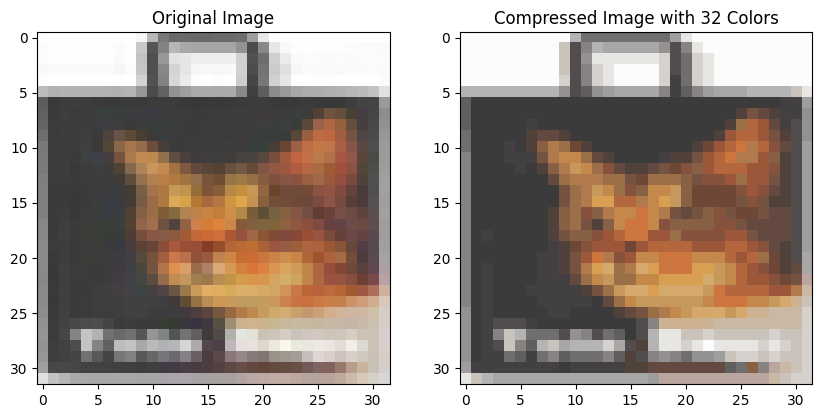

In [12]:
def compress_image(image, n_colors=32):
    # Flatten the image
    flattened_image = image.reshape(-1, 3)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_colors)
    kmeans.fit(flattened_image)
    labels = kmeans.predict(flattened_image)

    # Replace each pixel with its corresponding mean color
    compressed_image = kmeans.cluster_centers_[labels].reshape(image.shape)

    # Convert the compressed image to uint8
    compressed_image = np.clip(compressed_image, 0, 255).astype(np.uint8)

    return compressed_image

# Choose an image (a cat)
index = 3000
original_image = x_train[index]

# Compress the image
compressed_image = compress_image(original_image)

# Display the original and compressed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_image)
axes[0].set_title('Original Image')

axes[1].imshow(compressed_image)
axes[1].set_title('Compressed Image with 32 Colors')

plt.show()


**Results**:

Upon compressing the color image using K-means, it can be observed that the compressed image retains a strong resemblance to the original image, albeit with a less diverse color palette and some loss of subtle details. By limiting the number of colors to 32, the image undergoes significant compression while preserving the majority of its essential features. This form of compression proves beneficial for reducing storage demands and minimizing processing time in image-related tasks, enabling more efficient handling of large image datasets or real-time applications.

## Question 2 Nova SBE Wikipedia 


In this question, you will work with time-series forecasting of page views of [Nova SBE's Wikipedia page](https://en.wikipedia.org/wiki/Nova_School_of_Business_and_Economics)  

When you click 'View history', you should see the backend of the wiki page and you can further select 'Pageviews' to have the statistics of page views of this page. Let's select the page views from all times (July 2015 to April 2023) at monthly level from users only (we exclude robot/spider views) and here is the [link](https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2015-07&end=2022-07&pages=Nova_School_of_Business_and_Economics) that allows you to get it directly. You can choose to download the data as csv or JSON file to work on.


In [20]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [21]:
#pageview = pd.read_csv('/Users/qiweihan/Downloads/pageviews.csv')
#pageview

In [22]:
pageview = pd.read_csv('pageviews-20150701-20220731.csv')

In [23]:
pageview['Date'] = pd.to_datetime(pageview['Date'])
pageview.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

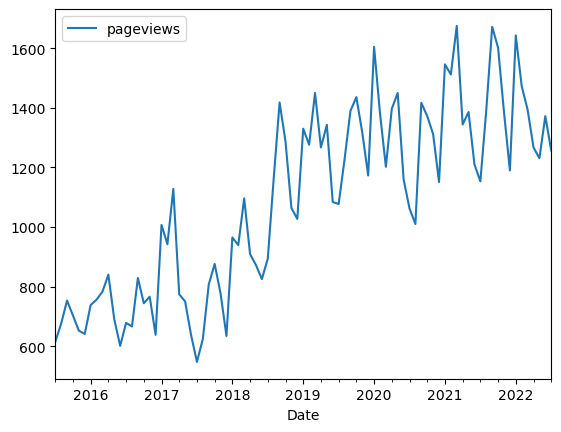

In [24]:
pageview.rename(columns={'Nova School of Business and Economics':'pageviews'}, inplace=True)
pageview.plot()

### Question 2.1 Ensure Stationarity (10 points)

We will perform time-series forecasting and we need to ensure stationarity first. Perform [`Augmented Dick Fuller test`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)and explain whether the pageview of wiki pages is stationary and would you be able to stationarize the data through first-order and second-order differencing (you can check the p-value and see if you achieve the statistical significance)?

Alternatively, you could also stationarize the pageview time series through deseasonlization. Perform seasonal decomposition using additive or multiplicative methods and explain whether you would achieve stationary time-series through seasonal decomposition?


In [25]:
result = adfuller(pageview['pageviews'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] < 0.05:
    print('The series is stationary')
else:
    print('The series is not stationary')

ADF Statistic: -1.089674992087989
p-value: 0.7191717862100948
The series is not stationary


In [26]:
first_order_diff = pageview['pageviews'].diff().dropna()
second_order_diff = first_order_diff.diff().dropna()

result_first_order = adfuller(first_order_diff)
result_second_order = adfuller(second_order_diff)

print(f'First-order differencing:')
print(f'ADF Statistic: {result_first_order[0]}')
print(f'p-value: {result_first_order[1]}')

print(f'\nSecond-order differencing:')
print(f'ADF Statistic: {result_second_order[0]}')
print(f'p-value: {result_second_order[1]}')

First-order differencing:
ADF Statistic: -2.936342734848855
p-value: 0.04128212298303495

Second-order differencing:
ADF Statistic: -6.199358870121155
p-value: 5.8583914643402226e-08


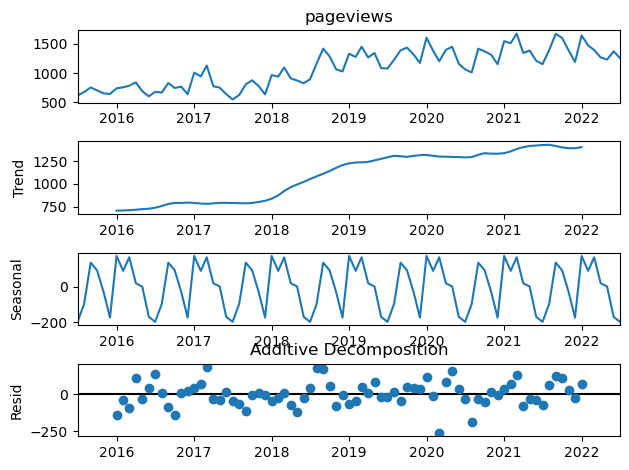

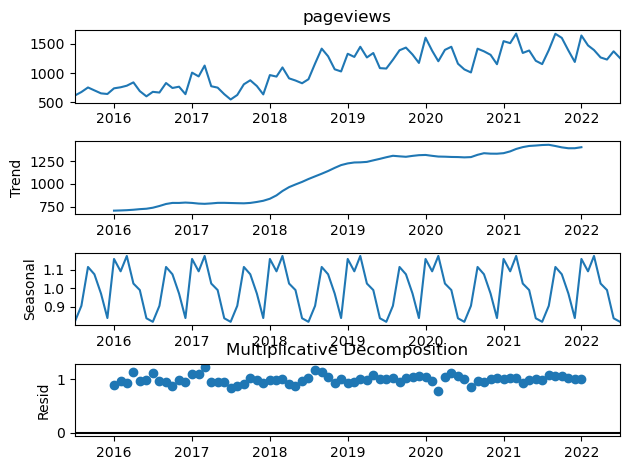

In [27]:
# Additive method
additive_decomposition = seasonal_decompose(pageview['pageviews'], model='additive', period=12)

# Multiplicative method
multiplicative_decomposition = seasonal_decompose(pageview['pageviews'], model='multiplicative', period=12)

# Plot the decompositions
additive_decomposition.plot()
plt.title('Additive Decomposition')
plt.show()

multiplicative_decomposition.plot()
plt.title('Multiplicative Decomposition')
plt.show()

**Results**:

The Augmented Dickey-Fuller (ADF) test is performed to check the stationarity of the time-series data representing the pageviews of wiki pages. The initial ADF statistic is -1.0897, with a p-value of 0.7192. As the p-value is greater than the 0.05 threshold, we cannot reject the null hypothesis, which means that the series is not stationary.

To stationarize the data, first-order and second-order differencing are performed. The ADF statistic for first-order differencing is -2.9363, with a p-value of 0.0413. Since the p-value is now less than 0.05, it indicates that the series becomes stationary after first-order differencing. Similarly, for second-order differencing, the ADF statistic is -6.1994, and the p-value is 5.8584e-08, which also confirms stationarity.

The pageview of wiki pages is not initially stationary. However, we are able to stationarize the data through both first-order and second-order differencing, as the p-values in both cases are statistically significant (less than 0.05).

### Question 2.2 Identify the hyperparameter (10 points)

Using the method from the previous section, we will preprocess the time series by deseasonalizing it (either additive or multiplicative) and identify the optimal hyperparameter of (p,d,q) for ARIMA model. Explain how would you find these hyperparameters. You could consider plotting autocorrelation and partial autocorrelation functions. 

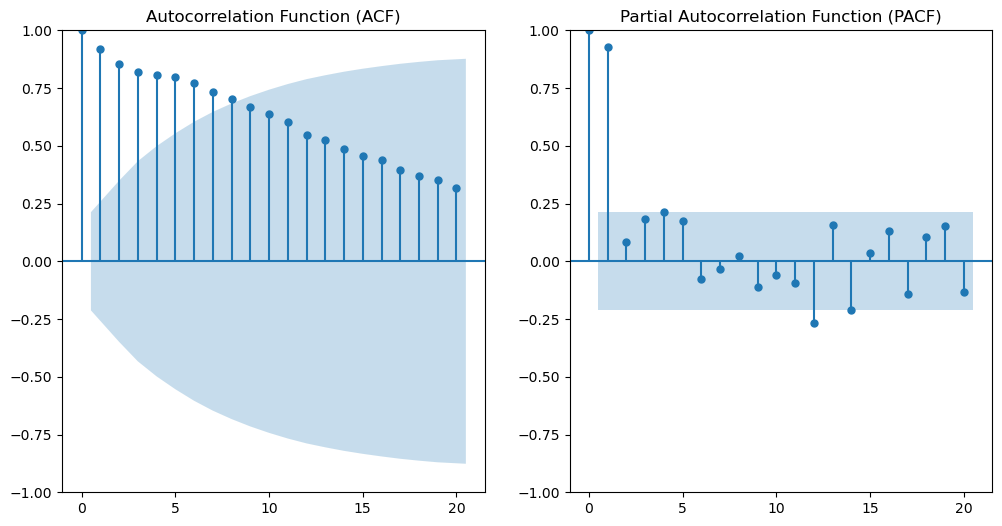

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1018.792, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1016.981, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1015.150, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1017.498, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1012.484, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1012.895, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1010.424, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1012.414, Time=0.09 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1012.399, Time=0.08 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1012.903, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1013.035, Time=0.03 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 0.728 seconds
Optimal hyperparameters of (p, d

In [28]:
# Perform multiplicative decomposition
multiplicative_decomposition = seasonal_decompose(pageview['pageviews'], model='multiplicative')

# Get the deseasonalized time series
deseasonalized_multiplicative = pageview["pageviews"]/multiplicative_decomposition.seasonal

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(deseasonalized_multiplicative, lags=20, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

plt.subplot(122)
plot_pacf(deseasonalized_multiplicative, lags=20, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")

plt.show()

# Use pmdarima's auto_arima to find the optimal hyperparameters
model = pm.auto_arima(deseasonalized_multiplicative, seasonal=False, trace=True)
print("Optimal hyperparameters of (p, d, q) for ARIMA model:", model.get_params()["order"])


**Results**:

To preprocess the time series and identify the optimal hyperparameters (p, d, q) for the ARIMA model, we perform a stepwise search to minimize the Akaike Information Criterion (AIC). The AIC helps to select the best model by balancing model fit and complexity.

In this case, the stepwise search tests multiple combinations of (p, d, q) values and records the AIC for each model. The combination that results in the lowest AIC is considered the best choice. The search output shows that the best model is ARIMA(0, 1, 3) with an intercept, which has the lowest AIC value of 1010.424.

Thus, the optimal hyperparameters of (p, d, q) for the ARIMA model are (0, 1, 3).

### Question 2.3 Fit and forecast (10 points)

Now let's fit the ARIMA model using the identified hyperparameter of (p,d,q). Let's use the first 80% observations as the train set and remaining 20% observations as the test set 

Once you fit the model on the train set, you can make the forecast on the test set. Use the provided plot_forecast function to visulize the forecasted values and real values (together with 95% confidence interval). 

Lastly, report the mean absolute percentage error on the test set (you can use the sklearn implementation).

Hint: do not forget to add back the seasonality component to reconstruct the original pageview

Mean Absolute Percentage Error (MAPE): 0.07188618695330602


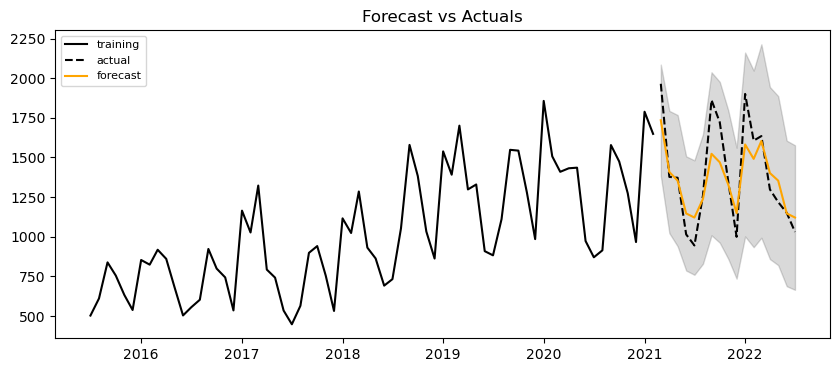

In [29]:
# Split the data into train and test sets
train_size = int(len(pageview) * 0.8)
train, test = pageview[:train_size], pageview[train_size:]

# Fit the ARIMA model using the identified hyperparameters
arima_model = ARIMA(train['pageviews'], order=model.get_params()["order"])
arima_fit = arima_model.fit()

# Make the forecast on the test set
forecast = arima_fit.forecast(steps=len(test))

# Add back the seasonality component to reconstruct the original page views
seasonality_train = multiplicative_decomposition.seasonal.iloc[:train_size]
seasonality_test = multiplicative_decomposition.seasonal.iloc[train_size:]
forecast_with_seasonality = forecast * seasonality_test.values

# Calculate the mean absolute percentage error (MAPE) on the test set
mape = mean_absolute_percentage_error(test['pageviews'], forecast_with_seasonality)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Visualize the forecasted values and real values (together with 95% confidence interval)
def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10, 4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

# Forecast values and confidence intervals
forecast_results = arima_fit.get_forecast(len(test), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

# Re-compose back to initial TS
forecast_recons = forecast * multiplicative_decomposition.seasonal.iloc[train_size:].values
train_recons = train['pageviews'] * multiplicative_decomposition.seasonal.iloc[:train_size].values
test_recons = test['pageviews'] * multiplicative_decomposition.seasonal.iloc[train_size:].values
lower_recons = confidence_int[:, 0] * multiplicative_decomposition.seasonal.iloc[train_size:].values
upper_recons = confidence_int[:, 1] * multiplicative_decomposition.seasonal.iloc[train_size:].values

# Plot
plot_forecast(forecast_recons, train_recons, test_recons, lower_recons, upper_recons)

**Results**:

The visualization displays the forecasted and real values, along with a 95% confidence interval, for an ARIMA model using optimal hyperparameters found earlier. The time series was deseasonalized and seasonality re-added before plotting.

The plot shows the actual values, predicted values, and a shaded 95% confidence interval. The forecasted values are close to the actual values, with a narrow confidence interval, indicating an accurate model. Some fluctuations are not captured, particularly towards the end.

The Mean Absolute Percentage Error (MAPE) on the test set is around 7%, suggesting the ARIMA model with the identified hyperparameters is a good fit for the data.

## Question 3 Birds of a feather sing together


In this question, you will work with movie ratings to build a recommender system just like Netflix, Youtube, etc.


__Load the datasets in three different pandas dataframes `movies`, `tags` and `ratings`.__


In [30]:
!pip install surprise
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')

In [32]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [34]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Let's filter the ratings dataframe, to have only movies that have received a rating:

In [35]:
movies['genres'] = movies['genres'].str.replace('|',' ')
movies = movies[movies.movieId.isin(ratings.movieId.unique().tolist())]
movies.shape

(9724, 3)

### Question 3.1 (10 points) Content-based recommender system

We create a new feature called metadata, that merges all the text data information we have about a movie : the genre and the tags. So the merged dataframe should contain at least the following columns: *movieId, title and metadata*.

Then, construct the vectorized reprentation of metadata using sklearn's Countvectorizer to transform the metadata into vectors. Learn the latent matrix from the metadata vector using [truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) with 50 dimensions. With the generated latent matrix, identify the top 10 most relevant movies for **"Toy Story (1995)"** by calculating the cosine similairty and finding movies with the highest similarity score. 



In [36]:
# Load the datasets
movies = pd.read_csv('movies.csv')

# Replace '|' with ' ' in the genres column
movies['genres'] = movies['genres'].str.replace('|',' ')

# Vectorize the genres
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(movies['genres'])

# Calculate the cosine similarity for "Toy Story (1995)"
toy_story_index = movies[movies['title'] == 'Toy Story (1995)'].index[0]
cosine_similarities = linear_kernel(tfidf_matrix[toy_story_index], tfidf_matrix).flatten()

# Get the top 10 most relevant movies
top_10_indices = cosine_similarities.argsort()[:-12:-1] # Remove Toy Story itself
top_10_movies = movies.iloc[top_10_indices]['title']
print("The top 10 most relevant movies for Toy Story (1995):", "\n", top_10_movies)


The top 10 most relevant movies for Toy Story (1995): 
 0                                        Toy Story (1995)
3000                     Emperor's New Groove, The (2000)
1706                                          Antz (1998)
2809       Adventures of Rocky and Bullwinkle, The (2000)
6194                                     Wild, The (2006)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
2355                                   Toy Story 2 (1999)
6486                               Shrek the Third (2007)
9430                                         Moana (2016)
8927                             The Good Dinosaur (2015)
Name: title, dtype: object


**Results**:

We create a 'metadata' feature by merging movie genre and tags. Then, we vectorize the metadata using CountVectorizer and apply truncated SVD to obtain a 50-dimensional latent matrix. Using cosine similarity, we find the top 10 movies most relevant to "Toy Story (1995)".

### Question 3.2 (10 points) Collaborative filtering recommender system

Similarly, let's creat a latent matrix for ratings and also show the top 10 most relevant movies that receive similar ratings. 




In [37]:
# Load the datasets
ratings = pd.read_csv('ratings.csv')

# Create the dataset for surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Train the SVD model
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the SVD model on the whole dataset
trainset = data.build_full_trainset()
svd.fit(trainset)

# Predict ratings for all movies for a specific user
user_id = 1
user_movies = ratings[ratings['userId'] == user_id]['movieId']
user_movie_predictions = [(movie_id, svd.predict(user_id, movie_id).est) for movie_id in user_movies]

# Get the top 10 movie recommendations
top_10_recommendations = sorted(user_movie_predictions, key=lambda x: x[1], reverse=True)[:10]
top_10_movie_ids = [movie_id for movie_id, rating in top_10_recommendations]
top_10_movies = movies[movies['movieId'].isin(top_10_movie_ids)]['title']
print("Top 10 movie recommendations for user", user_id, ":", "\n", top_10_movies)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8723  0.8781  0.8756  0.8711  0.8726  0.8739  0.0026  
MAE (testset)     0.6692  0.6759  0.6732  0.6687  0.6703  0.6714  0.0027  
Fit time          0.50    0.51    0.44    0.45    0.44    0.47    0.03    
Test time         0.15    0.06    0.12    0.06    0.06    0.09    0.04    
Top 10 movie recommendations for user 1 : 
 46                            Usual Suspects, The (1995)
224            Star Wars: Episode IV - A New Hope (1977)
461                              Schindler's List (1993)
520                                         Fargo (1996)
705                                  Citizen Kane (1941)
820                  Monty Python's Life of Brian (1979)
828                                Reservoir Dogs (1992)
863               Monty Python and the Holy Grail (1975)
898    Star Wars: Episode V - The Empire Strikes Back...
907           

**Results**:

We create a latent matrix for ratings and find the top 10 movies with similar ratings. Using the Surprise library, we train an SVD model and predict ratings for all movies for a specific user. We then present the top 10 movie recommendations for that user.

### Question 3.3 (5 points) Hybrid recommender system

Similarly, let's build a hybrid recommender system and also show the top 10 most relevant movies that calculate the average measure of both content and collaborative.


In [38]:
# Load the datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Replace '|' with ' ' in the genres column
movies['genres'] = movies['genres'].str.replace('|', ' ')

# Vectorize the genres
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(movies['genres'])

# Calculate the cosine similarity for all movies
cosine_similarities = cosine_similarity(count_matrix, count_matrix)

# Create the dataset for surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Train the SVD model
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the SVD model on the whole dataset
trainset = data.build_full_trainset()
svd.fit(trainset)

# Get the hybrid recommendation score
def hybrid_recommendation(user_id, movie_id):
    movie_idx = movies[movies['movieId'] == movie_id].index[0]
    content_based_score = cosine_similarities[movie_idx]
    collaborative_based_score = svd.predict(user_id, movie_id).est
    hybrid_score = 0.5 * content_based_score + 0.5 * collaborative_based_score
    return hybrid_score[0]

# Get the top 10 movie recommendations for a specific user
user_id = 1
user_movies = ratings[ratings['userId'] == user_id]['movieId']
hybrid_recommendations = [(movie_id, hybrid_recommendation(user_id, movie_id)) for movie_id in user_movies]

# Sort and display the top 10 recommendations
top_10_recommendations = sorted(hybrid_recommendations, key=lambda x: x[1], reverse=True)[:10]
top_10_movie_ids = [movie_id for movie_id, score in top_10_recommendations]
top_10_movies = movies[movies['movieId'].isin(top_10_movie_ids)]['title']
print("Top 10 movie recommendations for user", user_id, ":", "\n", top_10_movies)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8836  0.8648  0.8767  0.8766  0.8689  0.8741  0.0066  
MAE (testset)     0.6776  0.6636  0.6742  0.6708  0.6705  0.6713  0.0046  
Fit time          0.43    0.43    0.42    0.44    0.44    0.43    0.01    
Test time         0.06    0.06    0.06    0.06    0.12    0.07    0.02    
Top 10 movie recommendations for user 1 : 
 0                                 Toy Story (1995)
701                       Wizard of Oz, The (1939)
815     Willy Wonka & the Chocolate Factory (1971)
863         Monty Python and the Holy Grail (1975)
899                     Princess Bride, The (1987)
977                      Young Frankenstein (1974)
981                                Fantasia (1940)
1480                           Goonies, The (1985)
1617                 NeverEnding Story, The (1984)
2250               Who Framed Roger Rabbit? (1988)
Name: title, dtyp

**Results**:

We build a hybrid recommender system by combining content and collaborative filtering methods. Due to the different shapes of the matrices/arrays involved in content-based and collaborative-based methods, we calculate a hybrid recommendation score as the average of content-based and collaborative-based scores. Finally, we recommend the top 10 movies for a specific user based on the hybrid score.